## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [40]:
# Loading all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats as st
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go 
from datetime import datetime as dt


np.warnings.filterwarnings('ignore')


In [41]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,6)})

In [42]:
try:
    sales_df = pd.read_csv('product_sales.csv')
except:
    print('error')


# Data Validation


Cheking Data integrity:  data types , missing data, duplicates

In [43]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [44]:
sales_df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [45]:
#sales_method values 
sales_df['sales_method'].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

In [46]:
#lets correct sales_method categories
sales_dict = {'em + call':'Email + Call','email':'Email'}
sales_df['sales_method'] =  sales_df['sales_method'].replace(sales_dict)


In [47]:
sales_df['sales_method'].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

In [48]:
#customer_id
sales_df['customer_id'].nunique()

15000

* every customer is unique

In [49]:
#state 
sales_df['state'].value_counts()

California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode Islan

In [50]:
print('Number of states in the data set :',sales_df['state'].value_counts().shape[0])

Number of states in the data set : 50


* Cheking Missing data

In [51]:
sales_df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

* we see that revenue has missing values, lets find out why and its share of missing values

In [52]:
sales_df['revenue'].isna().sum()/ sales_df.shape[0] 

0.0716

Here I'll investigate a dataframe where the revenue is missing and try to understand why is missing

In [53]:
revenue_missing = sales_df[sales_df['revenue'].isna()]

In [54]:
revenue_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               1074 non-null   int64  
 1   sales_method       1074 non-null   object 
 2   customer_id        1074 non-null   object 
 3   nb_sold            1074 non-null   int64  
 4   revenue            0 non-null      float64
 5   years_as_customer  1074 non-null   int64  
 6   nb_site_visits     1074 non-null   int64  
 7   state              1074 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 75.5+ KB


In [55]:
#lets check sales method
revenue_missing['sales_method'].value_counts()

Email           544
Email + Call    349
Call            181
Name: sales_method, dtype: int64

In [56]:
# checking nb_sold
revenue_missing['nb_sold'].value_counts()

10    253
9     219
11    163
12    127
8     103
15     94
13     93
7      17
14      4
16      1
Name: nb_sold, dtype: int64

In [57]:
revenue_missing['nb_site_visits'].value_counts()

25    131
24    124
26    121
28    101
23     98
27     95
29     72
22     65
21     46
30     45
31     42
20     33
19     26
32     16
33     15
17     12
34     11
18      9
35      6
15      2
36      1
37      1
16      1
41      1
Name: nb_site_visits, dtype: int64

In [58]:
#cheking state
revenue_missing['state'].value_counts()

California        133
Florida            78
Texas              78
New York           66
Ohio               46
Pennsylvania       45
Illinois           41
Tennessee          32
Michigan           32
New Jersey         32
North Carolina     29
Georgia            29
Indiana            27
Washington         26
Virginia           26
Arizona            26
Missouri           25
Massachusetts      24
Colorado           18
Maryland           18
Wisconsin          18
Minnesota          17
Louisiana          17
Oregon             15
Arkansas           14
Kansas             13
Oklahoma           12
Alabama            12
Connecticut        12
South Carolina     11
Kentucky           11
Iowa               11
Utah                9
West Virginia       8
Delaware            7
Mississippi         6
Hawaii              5
New Hampshire       5
Nevada              5
Nebraska            5
Alaska              5
North Dakota        5
New Mexico          5
Idaho               3
South Dakota        3
Maine     


* Aparentely the missing data in 'revenue' is just missing at random. Ill check the mean and median and consider which to use to replace the missing rows


In [59]:
print('Revenue column MEAN = ',sales_df['revenue'].mean())
print('Revenue column MEDIAN = ', sales_df['revenue'].median())

Revenue column MEAN =  93.93494255349705
Revenue column MEDIAN =  89.5


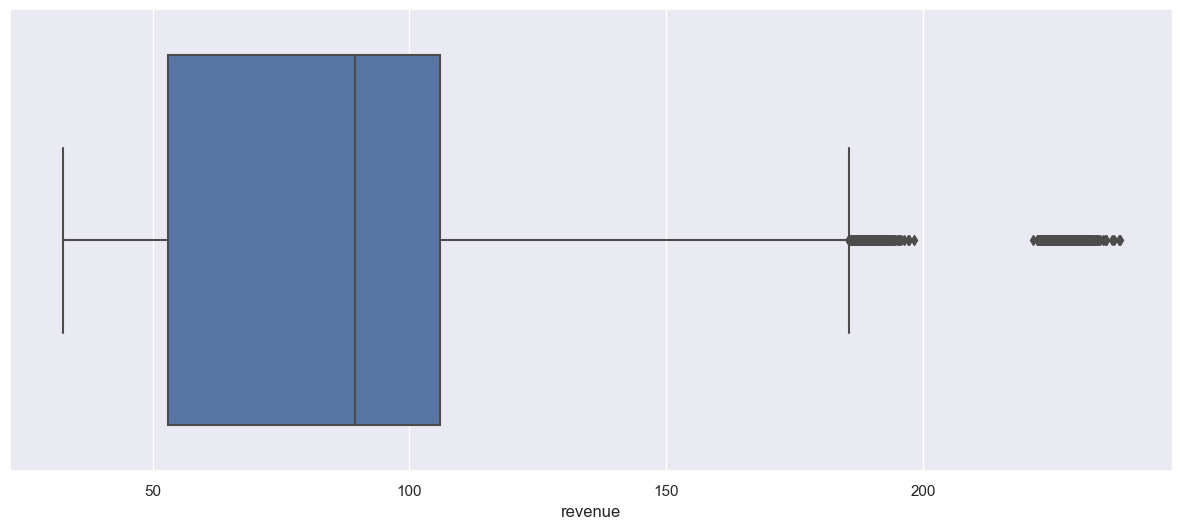

In [133]:
sns.boxplot( x= sales_df['revenue']);

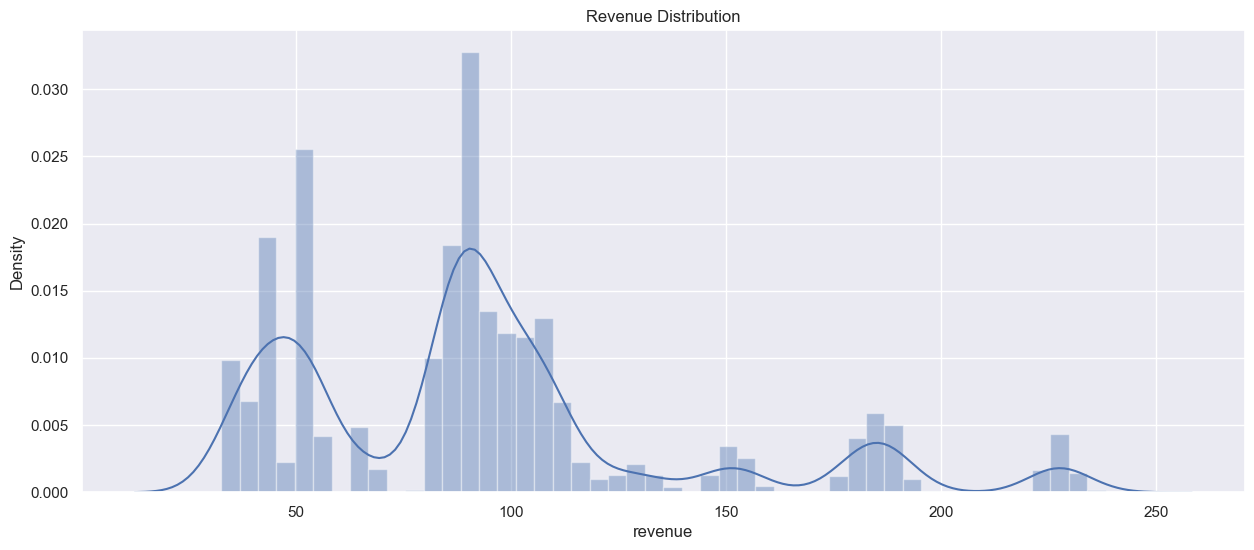

In [139]:
sns.distplot(sales_df['revenue']).set_title('Revenue Distribution');

* Since the 'revenue' column is askewed i'll replace the missing values withe the median

In [60]:
sales_df['revenue'] = sales_df['revenue'].fillna(sales_df['revenue'].median())

In [61]:
#missing data recheck
sales_df['revenue'].isna().sum()

0

* Duplicates check

In [62]:
duplicates = sales_df.duplicated()
duplicates.sum()

0

* years_as_customer 

In [63]:
sales_df['years_as_customer'].describe()

count    15000.000000
mean         4.965933
std          5.044952
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         63.000000
Name: years_as_customer, dtype: float64

* Here we discover that there are values in the years_as_customer column that do not make sense because the company has only existed since 1984. Therefore the maximum value should be 39

In [64]:
#values to replace
sales_df.loc[sales_df['years_as_customer']>39,'years_as_customer']

13741    63
13800    47
Name: years_as_customer, dtype: int64

In [65]:
sales_df.loc[sales_df['years_as_customer']>39,'years_as_customer'] = 39

In [66]:
#recheck
sales_df.loc[sales_df['years_as_customer']>39,'years_as_customer']

Series([], Name: years_as_customer, dtype: int64)

# Exploratory Data Analysis

## How many customers were there for each approach?

In [67]:
#group by sales_method and count customer_id
customers_per_method = pd.DataFrame(sales_df.groupby('sales_method')['customer_id'].count()).reset_index()
customers_per_method.rename(columns={'customer_id':'customer count'},inplace=True)


In [68]:
customers_per_method['percentage']= customers_per_method['customer count']  / customers_per_method['customer count'].sum()
customers_per_method['percentage']= customers_per_method['percentage'].round(2)

In [69]:
customers_per_method

,sales_method,customer count,percentage
0,Call,4962,0.33
1,Email,7466,0.50
2,Email + Call,2572,0.17


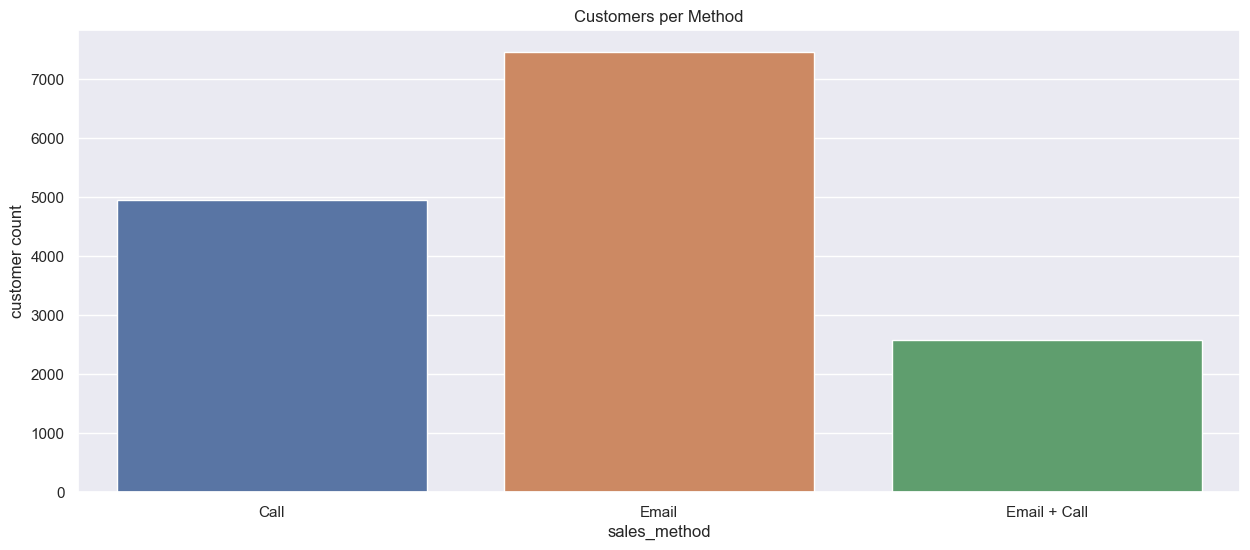

In [70]:
sns.barplot(data=customers_per_method, x="sales_method",y='customer count').set_title('Customers per Method');

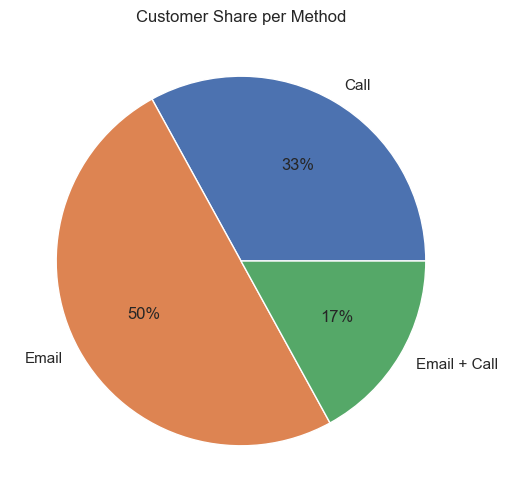

In [71]:
plt.pie(customers_per_method['percentage'],labels = customers_per_method['sales_method'],autopct='%.0f%%');
plt.title('Customer Share per Method')
plt.show()

* Its clear that the Email method has had more customers throughout the period

## What does the spread of the revenue look like overall? And for each method?

In [73]:
#group by method : sum, avg, revenue
revenue_per_method = sales_df.groupby('sales_method').agg(['count','sum','mean','median'])['revenue'].reset_index()
revenue_per_method

,sales_method,count,sum,mean,median
0,Call,4962,243762.99,49.125955,49.935
1,Email,7466,721005.83,96.571903,94.275
2,Email + Call,2572,439492.19,170.875657,182.135


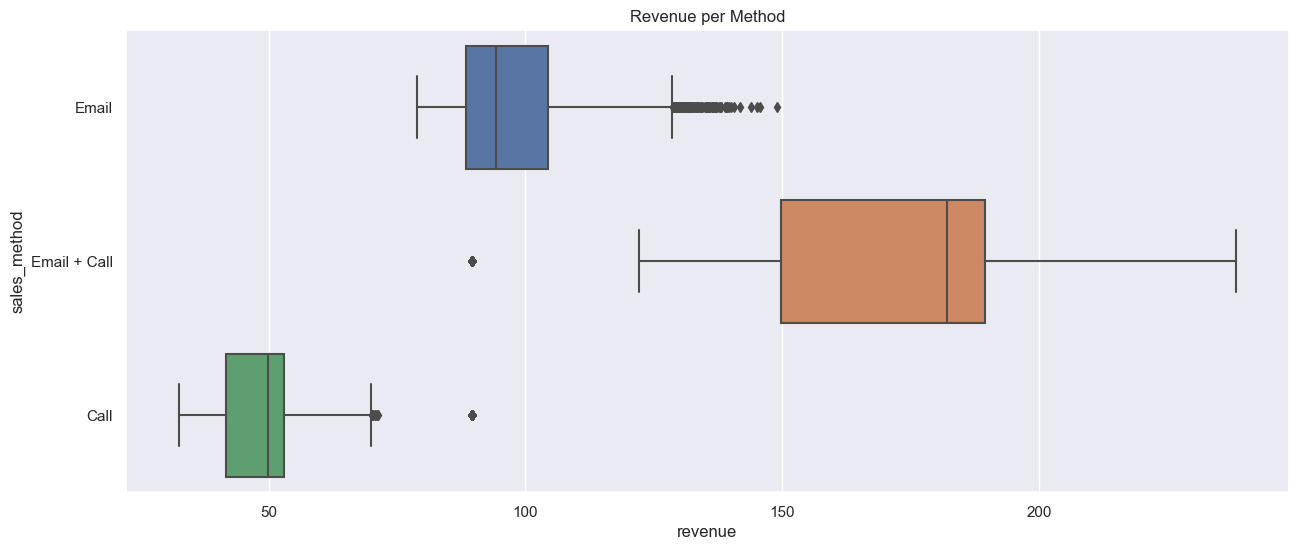

In [136]:
sns.boxplot(data=sales_df,x='revenue',y='sales_method').set_title('Revenue per Method');

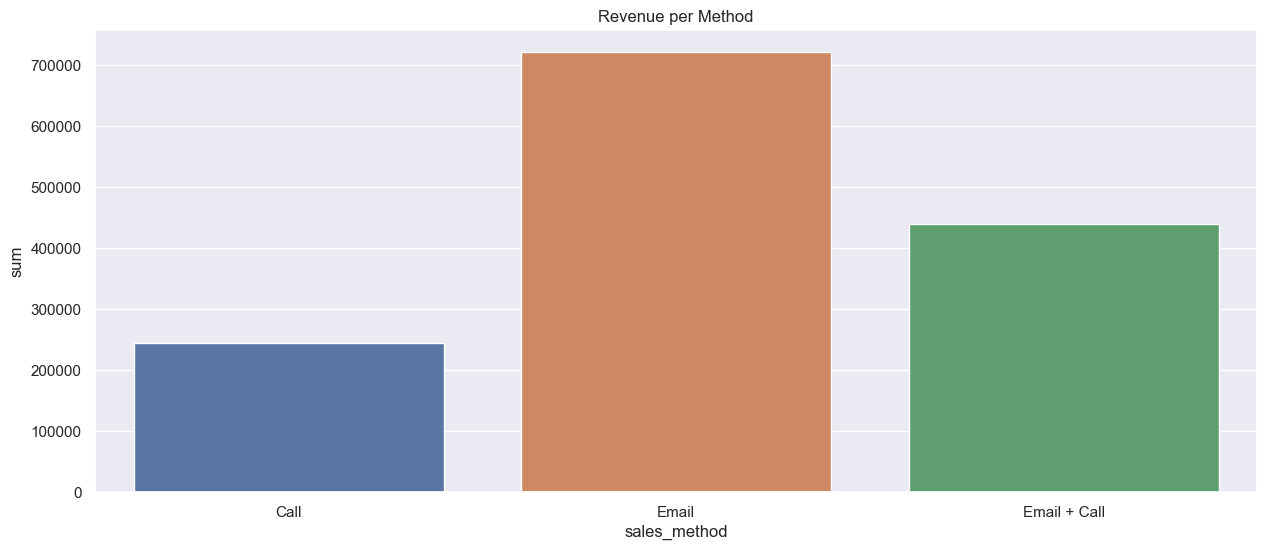

In [74]:
sns.barplot(data=revenue_per_method, x='sales_method' ,y='sum').set_title('Revenue per Method');

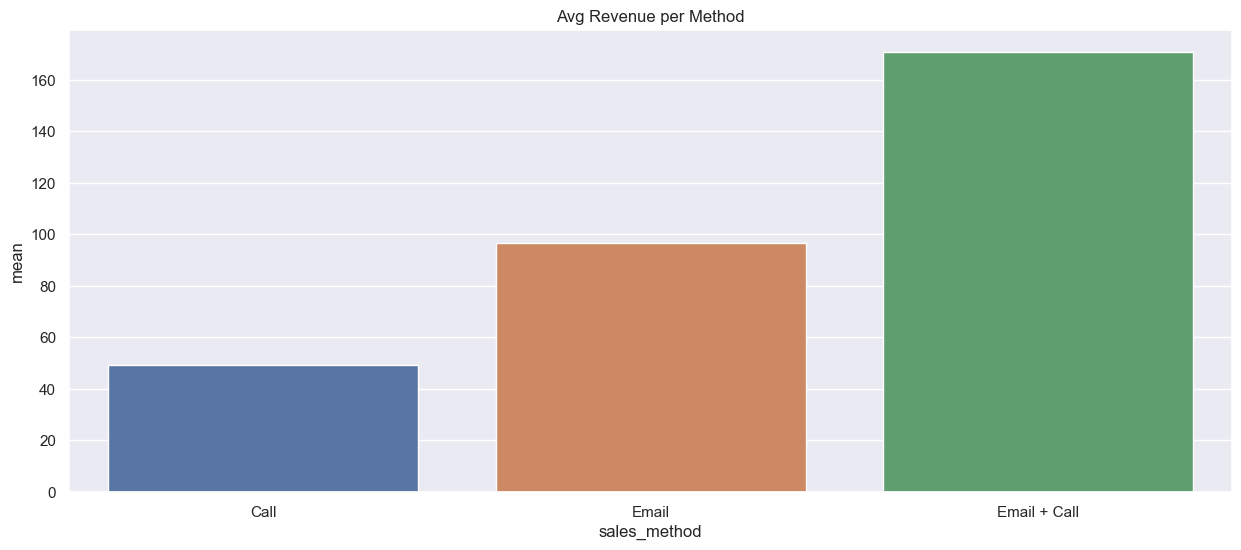

In [75]:
sns.barplot(data=revenue_per_method, x='sales_method' ,y='mean').set_title('Avg Revenue per Method');

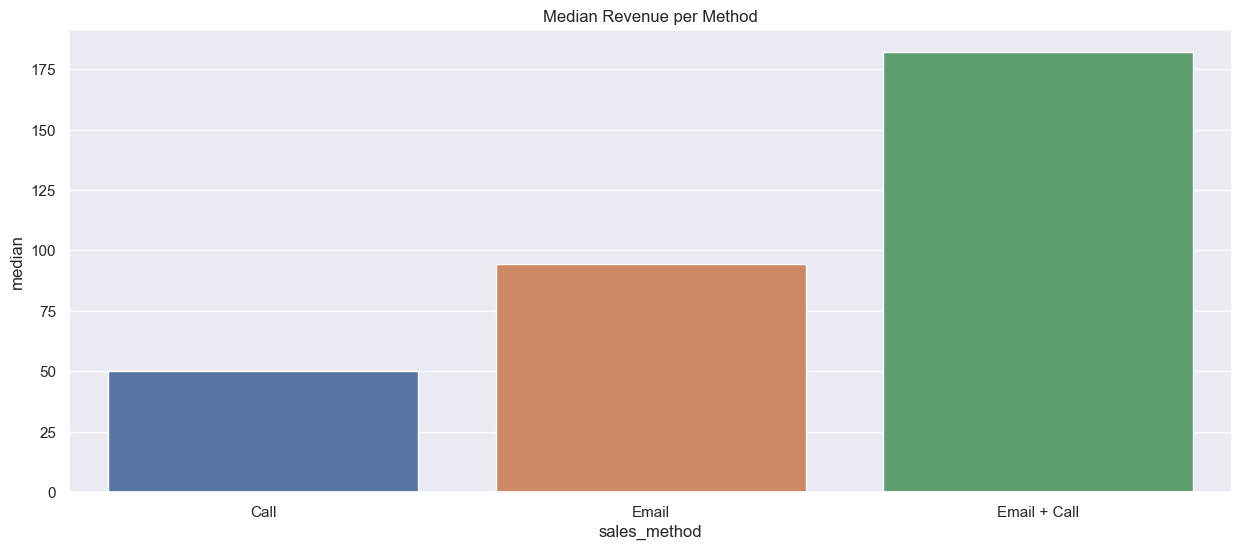

In [76]:
sns.barplot(data=revenue_per_method, x='sales_method' ,y='median').set_title('Median Revenue per Method');


* What is interesting is that although the 'Email' method brings the most revenue, the 'Email + Call' method has almost the double in avg and median revenue 


# Was there any difference in revenue over time for each of the methods?

In [78]:
#to answer this question ill create a separate df per method and anlayse the revenue per years_as_customer and then per week
calls_df = sales_df[sales_df['sales_method']=='Call']
emails_df = sales_df[sales_df['sales_method']=='Email']
emails_calls_df = sales_df[sales_df['sales_method']=='Email + Call']

In [79]:
#calls_df
calls_revenue_per_num_of_years = calls_df.groupby('years_as_customer')['revenue'].agg(['sum','mean']).reset_index().round(2)

In [80]:
#Emails
emails_revenue_per_num_of_years = emails_df.groupby('years_as_customer')['revenue'].agg(['sum','mean']).reset_index().round(2)

In [81]:
#Emails + Calls
emails_calls_revenue_per_num_of_years = emails_calls_df.groupby('years_as_customer')['revenue'].agg(['sum','mean']).reset_index().round(2)

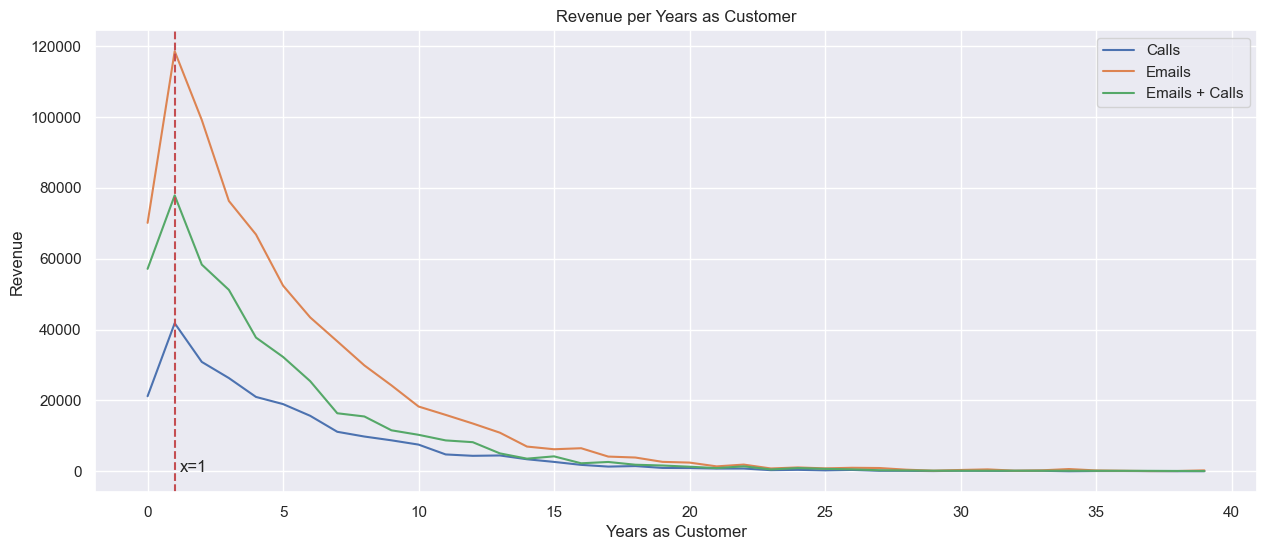

In [82]:
plt.plot(calls_revenue_per_num_of_years['years_as_customer'],calls_revenue_per_num_of_years['sum'])
plt.plot(emails_revenue_per_num_of_years['years_as_customer'],emails_revenue_per_num_of_years['sum'])
plt.plot(emails_calls_revenue_per_num_of_years['years_as_customer'],emails_calls_revenue_per_num_of_years['sum'])
plt.axvline(x=1,color='r',linestyle='--')
plt.text(1.2,0,'x=1',rotation=0)
plt.legend(['Calls','Emails','Emails + Calls'])
plt.title('Revenue per Years as Customer')
plt.xlabel('Years as Customer')
plt.ylabel('Revenue')
plt.show()

* This graph tell us that a new customer (the first year) will bring the highest revenue, but this doesnt explain what is the difference in revenue over time
* We'll explore the number of products sold per week next and then the revenue per week

## Lets explore the products that were sold per Week

In [83]:
#separate df's for each method
calls_nb_sold = calls_df.groupby('week')['nb_sold'].sum().reset_index()
emails_nb_sold = emails_df.groupby('week')['nb_sold'].sum().reset_index()
emails_calls_nb_sold = emails_calls_df.groupby('week')['nb_sold'].sum().reset_index()


In [84]:
#creating a pivot table
nb_sold_pivot = sales_df.pivot_table(index='week',
                                     values=['nb_sold'],
                                     columns='sales_method',aggfunc='sum')
nb_sold_pivot

nb_sold                    
sales_method    Call  Email Email + Call
week                                    
1               5366  24573         1281
2               7088  14952         2016
3               7456  10678         3594
4              10259  11736         5960
5              11129   8117         9817
6               5889   2583         8776

In [85]:
nb_sold_pivot['nb_sold'].columns

Index(['Call', 'Email', 'Email + Call'], dtype='object', name='sales_method')

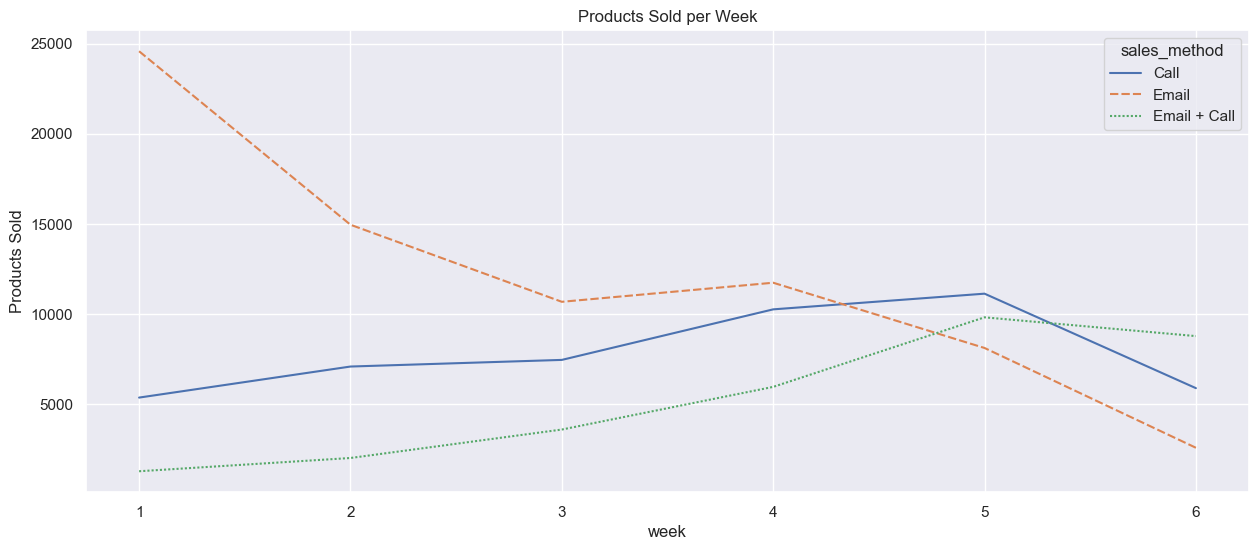

In [86]:
g= sns.lineplot(data=nb_sold_pivot['nb_sold'],
             ).set_title('Products Sold per Week');
plt.ylabel('Products Sold');

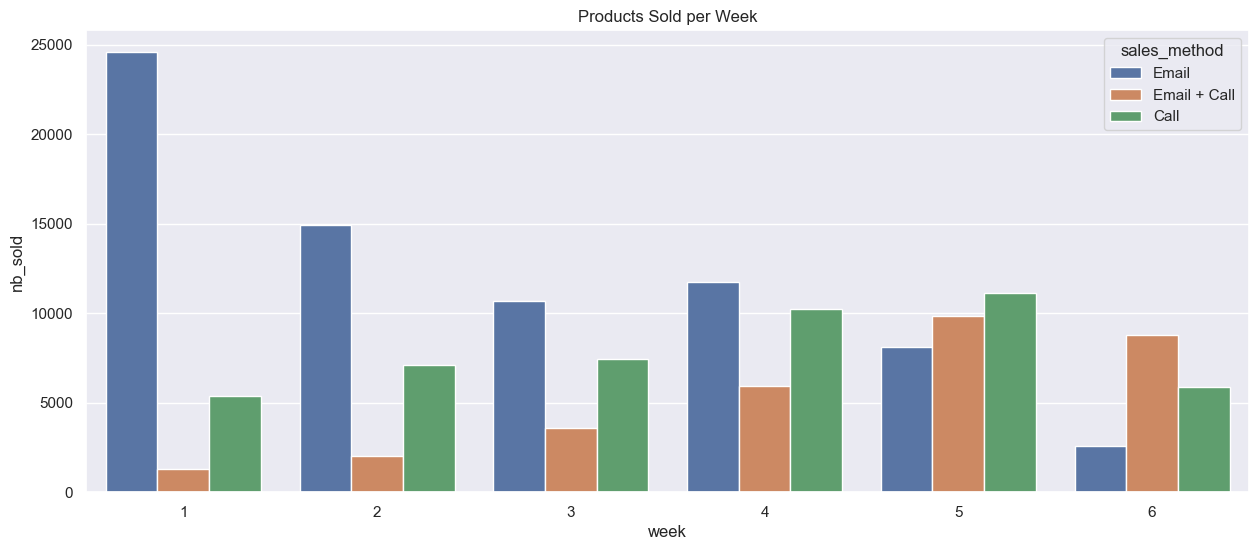

In [87]:
g= sns.barplot(data=sales_df,
             x='week',
             y='nb_sold',
             hue='sales_method',
             estimator='sum',            
             ci=None).set_title('Products Sold per Week');

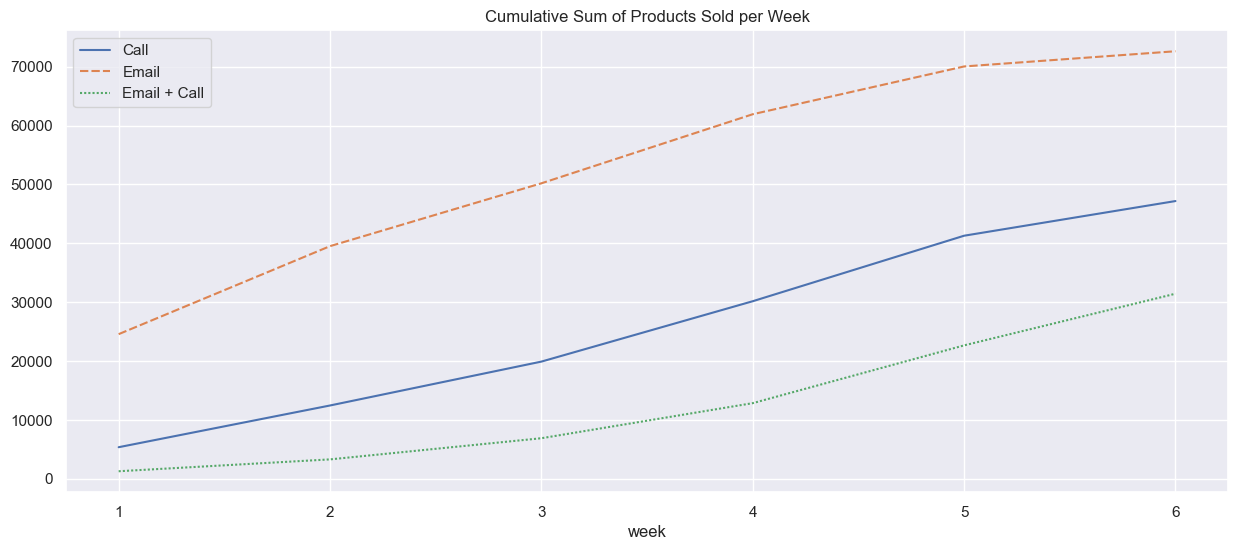

In [88]:
#cumulative sum of products sold
nb_sold_per_week = nb_sold_pivot['nb_sold']
nb_sold_per_week_cumulative = pd.DataFrame(nb_sold_per_week['Call'].cumsum())
nb_sold_per_week_cumulative['Email'] = nb_sold_per_week['Email'].cumsum()
nb_sold_per_week_cumulative['Email + Call'] = nb_sold_per_week['Email + Call'].cumsum()
ng= sns.lineplot(data=nb_sold_per_week_cumulative
            ).set_title('Cumulative Sum of Products Sold per Week');


### Lets explore the Revenue per Week


In [89]:
revenue_pivot = sales_df.pivot_table(index='week',
                                     values=['revenue'],
                                     columns='sales_method',aggfunc='sum')
revenue_pivot

revenue                        
sales_method      Call      Email Email + Call
week                                          
1             27770.18  246681.05     18406.83
2             36477.02  147647.07     28971.73
3             39290.27  106399.64     51869.64
4             53263.49  115395.87     83845.20
5             56829.61   79743.45    136744.22
6             30132.42   25138.75    119654.57

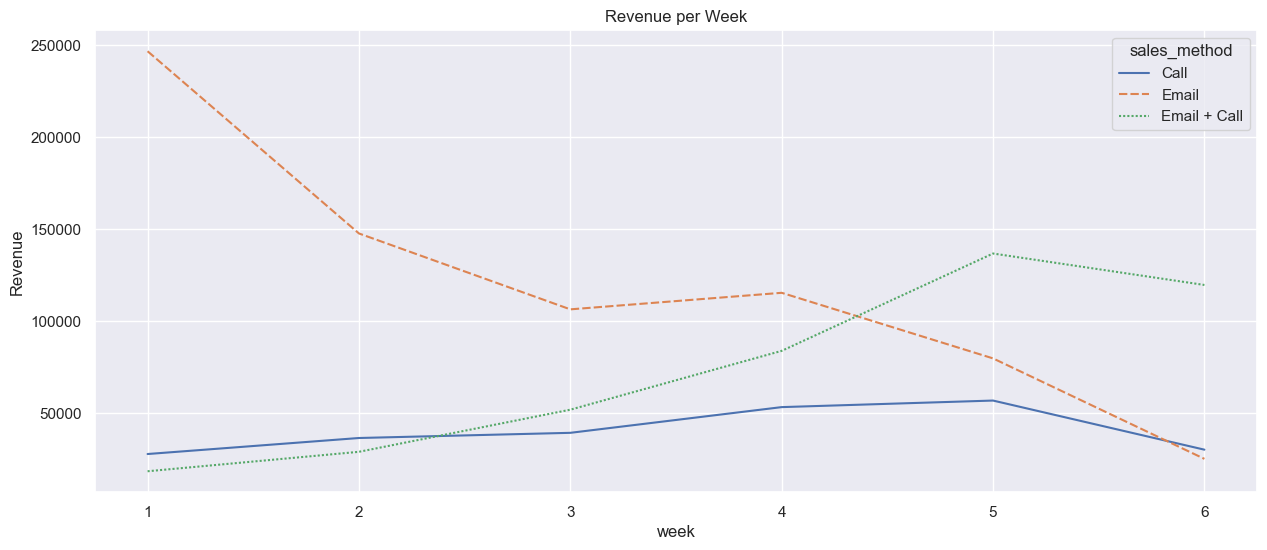

In [90]:
g= sns.lineplot(data=revenue_pivot['revenue'],
             ).set_title('Revenue per Week');
plt.ylabel('Revenue');

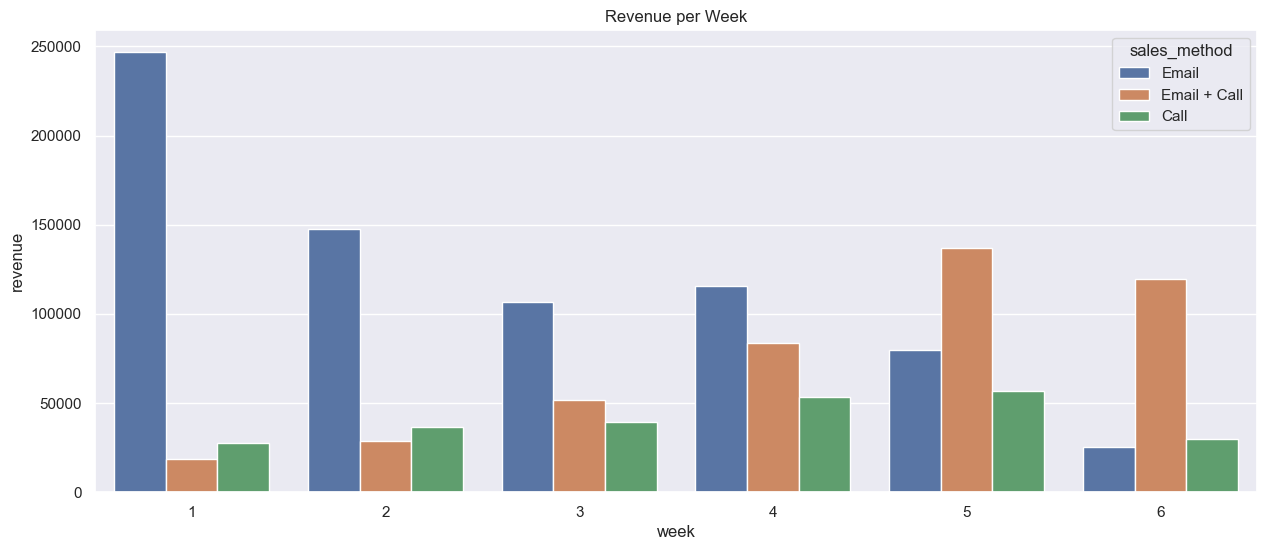

In [93]:
g= sns.barplot(data=sales_df,
             x='week',
             y='revenue',
             hue='sales_method',
             estimator='sum',
             ci=None).set_title('Revenue per Week');

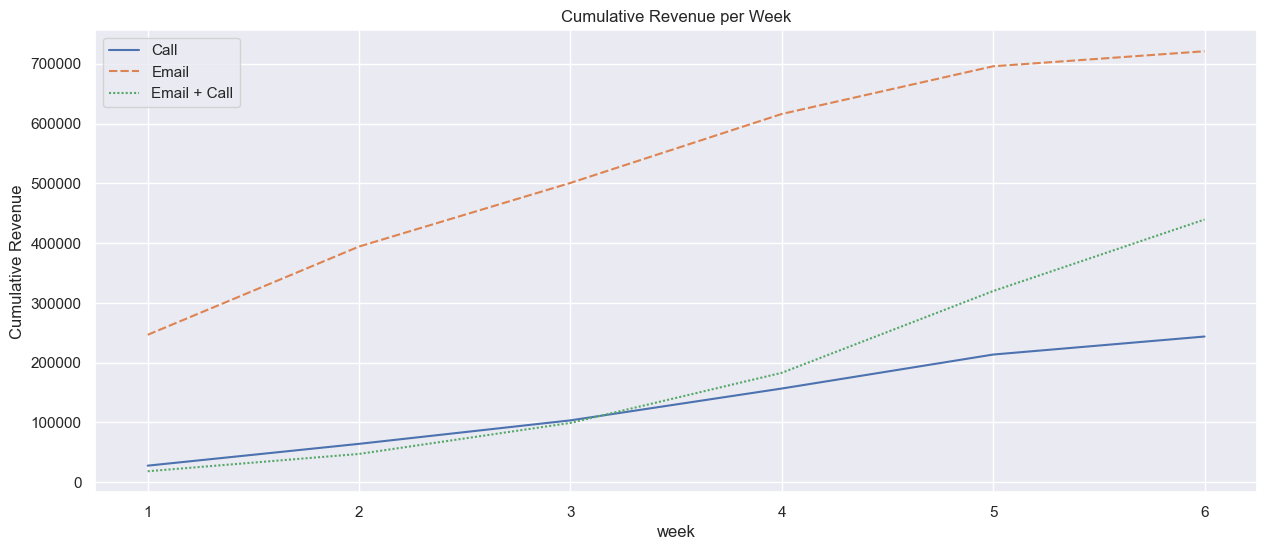

In [94]:
#cumulative sum of revenue
revenue_per_week = revenue_pivot['revenue']
revenue_per_week_cumulative = pd.DataFrame(revenue_per_week['Call'].cumsum())
revenue_per_week_cumulative['Email'] = revenue_per_week['Email'].cumsum()
revenue_per_week_cumulative['Email + Call'] = revenue_per_week['Email + Call'].cumsum()
g2= sns.lineplot(data=revenue_per_week_cumulative
            ).set_title('Cumulative Revenue per Week');
plt.ylabel('Cumulative Revenue');

### Lets explore Visits per Week

In [96]:
visits_df =  sales_df.groupby(['sales_method'])['nb_site_visits'].agg(['sum','mean']).reset_index()
visits_df

,sales_method,sum,mean
0,Call,121191,24.423821
1,Email,184816,24.754353
2,Email + Call,68856,26.771384


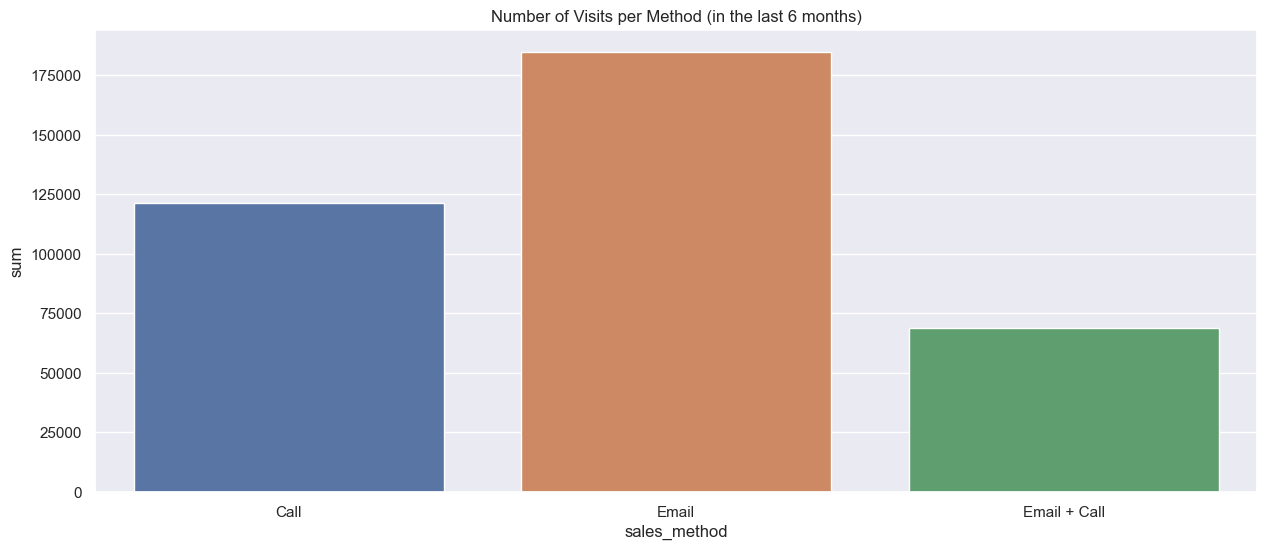

In [97]:
sns.barplot(data=visits_df,
            x='sales_method',
            y='sum'
           ).set_title('Number of Visits per Method (in the last 6 months)');

## Findings:
* Clients that have been with the company for less than a year bring the most revenue
* Although the Email method looks very promising at the start of the sale at around week 3 it looses momentum and by week 6 is no longer bringing the most revenue and seems like is not working
* On the other hand the Email + Call sales method starts very slow and by the end of the period not only is it bringing most of the revenue but also seems to have the better momentum of the 3 methods
* The Call method seems to be a steady one in terms of revenue

# Definition of a metric for the business to monitor

 it seems that 'Email + Call' seem to be the most promising method, to prove this we'll look at <b>Avg Revenue per Visits Ratio</b>

In [98]:
# average revenue per method
avg_revenue_per_method = sales_df.groupby('sales_method')['revenue'].agg('mean').reset_index()
avg_revenue_per_method

,sales_method,revenue
0,Call,49.125955
1,Email,96.571903
2,Email + Call,170.875657


In [99]:
#ratio
avg_revenue_per_method['total_visits']  = visits_df['sum']
avg_revenue_per_method['avg_revenue_per_visits'] = avg_revenue_per_method['revenue']/avg_revenue_per_method['total_visits']
avg_revenue_per_method

,sales_method,revenue,total_visits,avg_revenue_per_visits
0,Call,49.125955,121191,0.000405
1,Email,96.571903,184816,0.000523
2,Email + Call,170.875657,68856,0.002482


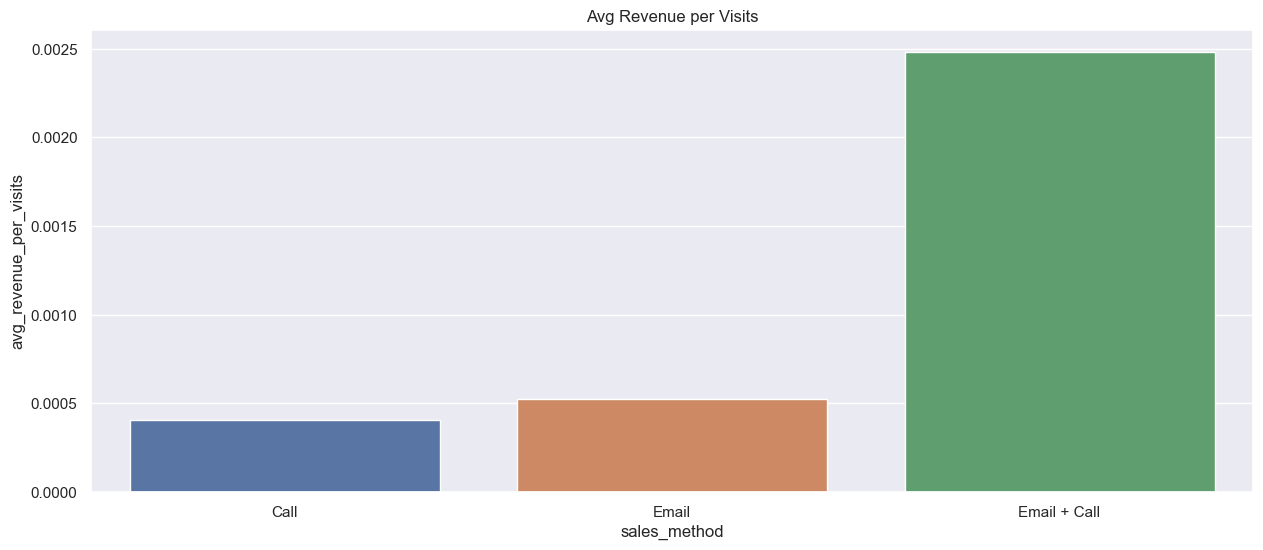

In [100]:
sns.barplot(data=avg_revenue_per_method,x='sales_method',y='avg_revenue_per_visits').set_title('Avg Revenue per Visits');

* For  "Email and call" we see less visits but a higher avg revenue, this means that the method is bringing clients that will spend more

* Although the scale is very small its clear that 'Email + Call' method is around 5 times more efective than the other 2 methods

##  We can set the initial value of the Avg Revenue per visit at 0.0024
* Seeing that the 'Email + Call' method has the better potential for future sales this value can be the Benchmark


## Total Revenue / Time on call 

In [101]:
dict_ =  {'sales_method':['Call','Email','Call + Email'],'Time(mins)':[30,1,10]}
time_on_call_df =  pd.DataFrame(data = dict_)
time_on_call_df

,sales_method,Time(mins)
0,Call,30
1,Email,1
2,Call + Email,10


In [102]:
revenue_df= sales_df.pivot_table(index='sales_method',values=['revenue'],aggfunc=['sum','mean']).reset_index()
revenue_df

,sales_method,sum,mean
,,revenue,revenue
0,Call,243762.99,49.125955
1,Email,721005.83,96.571903
2,Email + Call,439492.19,170.875657


In [103]:
revenue_df['mean']['revenue']

0     49.125955
1     96.571903
2    170.875657
Name: revenue, dtype: float64

In [104]:
#total revenue vs time on call
total_revenue = sales_df.groupby('sales_method')['customer_id'].count().reset_index()
total_revenue.rename(columns={'customer_id':'customer_count'},inplace=True)
total_revenue['Time_per_call'] = time_on_call_df['Time(mins)']
total_revenue['minutes_on_call'] = total_revenue.customer_count * total_revenue.Time_per_call
total_revenue['hours_on_call'] = total_revenue.minutes_on_call / 60
total_revenue['revenue'] = revenue_df['sum']['revenue']
total_revenue['revenue_per_hour'] = total_revenue['revenue'] / total_revenue['hours_on_call']

total_revenue.round(2)

,sales_method,customer_count,Time_per_call,minutes_on_call,hours_on_call,revenue,revenue_per_hour
0,Call,4962,30,148860,2481.00,243762.99,98.25
1,Email,7466,1,7466,124.43,721005.83,5794.31
2,Email + Call,2572,10,25720,428.67,439492.19,1025.25


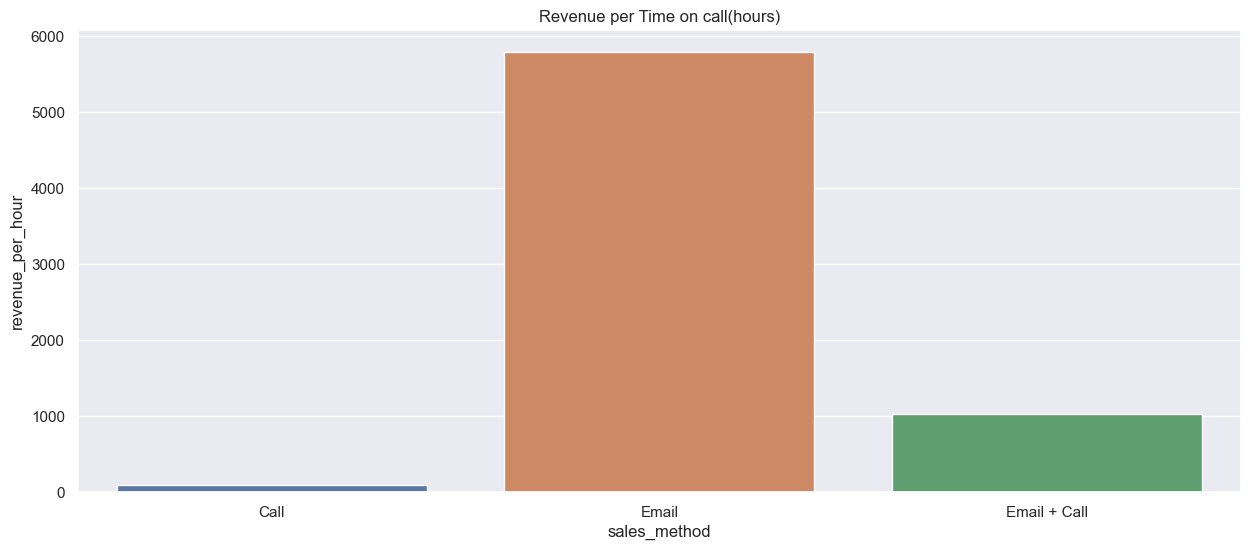

In [105]:
sns.barplot(data=total_revenue,x='sales_method',y='revenue_per_hour' ).set_title('Revenue per Time on call(hours)');

* This exploration is inconclusive and ambiguious , although it proves that the "Call" method is not very practical, we can conclude that 'Email' is the more efficient if we look at the time it takes to send it, but we have to remember that the 'Call and email' method brings 5 times the revenue compared to the other 2 methods

### Overall 10 top states by Revenue

In [106]:
states_df = sales_df.pivot_table(index='state',
                                values=['nb_sold','revenue'],
                                aggfunc=('sum')).reset_index().sort_values('revenue',ascending=False)

In [119]:
states_df[['state','revenue']].head(10)

,state,revenue
4,California,172944.39
42,Texas,113275.45
31,New York,89149.74
8,Florida,84632.75
12,Illinois,56318.85
37,Pennsylvania,55622.85
34,Ohio,52127.94
21,Michigan,47288.81
9,Georgia,46021.91
32,North Carolina,41013.65


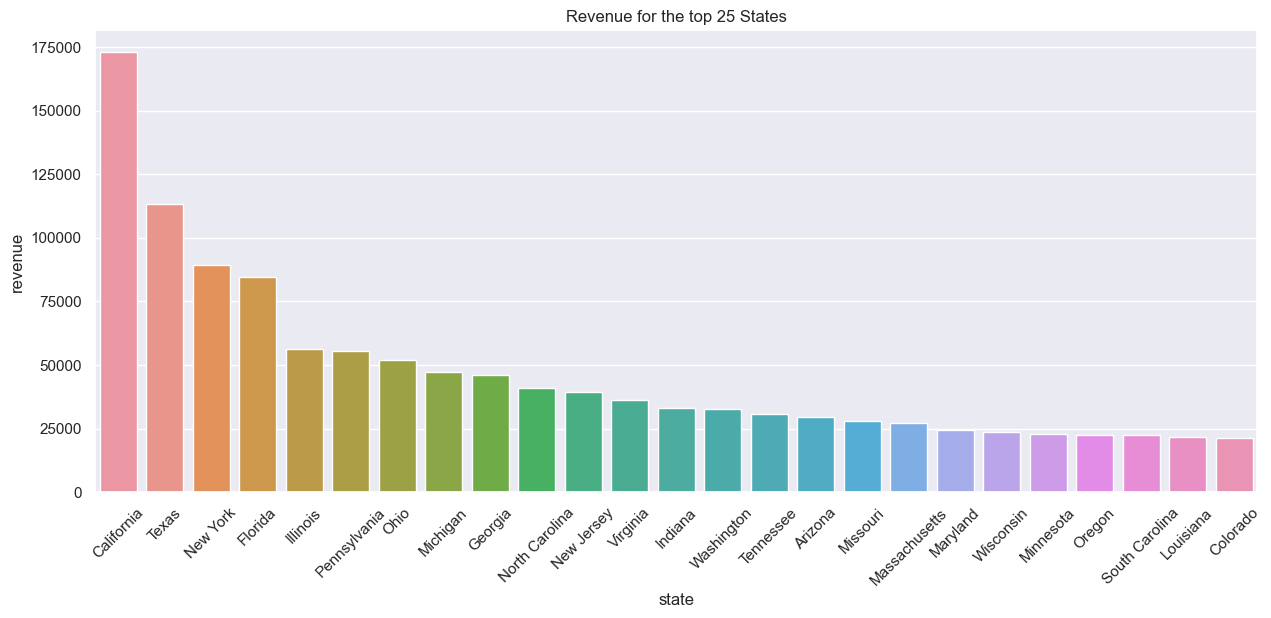

In [107]:
sns.barplot(data = states_df.head(25),x='state',y='revenue').set_title('Revenue for the top 25 States');
plt.xticks(rotation=45);

In [130]:
top25 =states_df.head(25)
top25['revenue_share'] = top25['revenue'] / top25['revenue'].sum().round(2)

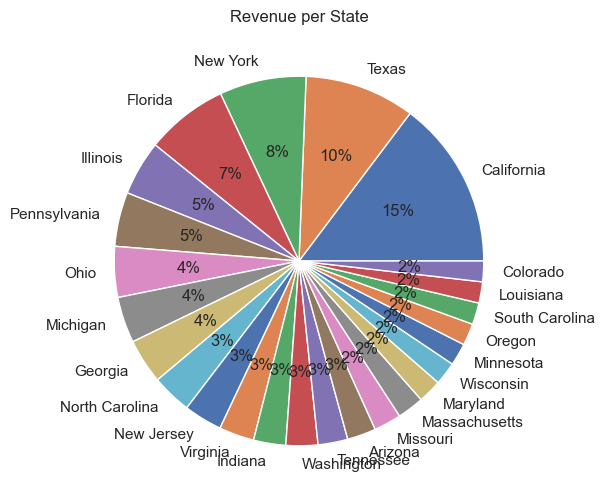

In [131]:
#share of revenue
plt.pie(top25['revenue_share'],labels = top25['state'],autopct='%.0f%%');
plt.title('Revenue per State')
plt.show()

# Are there other differences between the customers in each group?

## To answer this question we'll do some A/B tests between the groups 

* Null Hypothesis #1: The revenue of 'Calls' and 'Emails' is the same
* Lets set our threshold at 0.05

In [121]:
alpha = 0.05
calls_rev_revenue =  calls_df['revenue']
emails_rev_revenue = emails_df['revenue']
emails_calls_revenue = emails_calls_df['revenue']

In [122]:
statistic, p_val = st.ttest_ind(calls_rev_revenue,emails_rev_revenue)
print('statistic= ',statistic)
print('p_val= ',p_val)
if p_val >= alpha:
    print('We dont reject the Null hypothesis')
else:
    print('There is evidence against the Null Hypothesis #1')


statistic=  -231.21552948817228
p_val=  0.0
There is evidence against the Null Hypothesis #1


* Null Hypothesis #2: The revenue of 'Calls' and 'Emails + Calls' is the same

In [126]:
statistic, p_val = st.ttest_ind(calls_rev_revenue,emails_calls_revenue)

In [127]:
print('statistic= ',statistic)
print('p_val= ',p_val)
if p_val >= alpha:
    print('We dont reject the Null hypothesis')
else:
    print('There is evidence against the Null Hypothesis #2')


statistic=  -190.4534782169076
p_val=  0.0
There is evidence against the Null Hypothesis #2


* Null Hypothesis #3: The revenue of 'Email' and 'Emails + Calls' is the same

In [128]:
statistic, p_val = st.ttest_ind(emails_rev_revenue,emails_calls_revenue)

In [129]:
print('statistic= ',statistic)
print('p_val= ',p_val)
if p_val >= alpha:
    print('We dont reject the Null hypothesis')
else:
    print('There is evidence against the Null Hypothesis #3')

statistic=  -139.42673598048742
p_val=  0.0
There is evidence against the Null Hypothesis #3


## This tests confirm that the sales methods  are significantly different from each other.

# Final Summary and Recomendations

* Thinking long term the company should focus on using the 'Email + Call' Method for sales after discovering that it has the best momentum on a wider time range
* Clients that have been with the company for up to less than a year tend to bring a lot or revenue
* By measuring how much time the sales reps spent on each method we found out that 'Calls' is not very efficient compare to the other two - by magnitud of 10
* Instead of having an only 'Call' method the company might want to  use 'Email + Call' instead
* We found out that California and Texas are the leading states by revenue
* The groups are statistically different from each other

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation